<a href="https://colab.research.google.com/github/rukmals/Result-Prediction/blob/main/result_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Driver Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### import libraries

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

### import data

In [3]:
training_set = pd.read_csv("/content/drive/MyDrive/result_prediction/student_marks_train.csv") ## use own location to store data set and add the correct path
test_set = pd.read_csv("/content/drive/MyDrive/result_prediction/student_marks_test.csv")

In [4]:
training_set.head()

,maths,sinhala,english,history,class-label
0,38,32,66,48,pass
1,60,78,94,47,fail
2,39,29,67,49,pass
3,59,84,94,55,fail
4,55,73,80,46,fail


In [5]:
training_labels = training_set['class-label']

### Exploring the Data

In [6]:
training_set.head()

,maths,sinhala,english,history,class-label
0,38,32,66,48,pass
1,60,78,94,47,fail
2,39,29,67,49,pass
3,59,84,94,55,fail
4,55,73,80,46,fail


In [7]:
training_set.shape

(120, 5)

In [8]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   maths        120 non-null    int64 
 1   sinhala      120 non-null    int64 
 2   english      120 non-null    int64 
 3   history      120 non-null    int64 
 4   class-label  120 non-null    object
dtypes: int64(4), object(1)
memory usage: 4.8+ KB


In [9]:
training_set.describe()

,maths,sinhala,english,history
count,120.000000,120.000000,120.00000,120.000000
mean,49.016667,54.833333,75.62500,47.808333
std,7.681675,18.175768,8.66371,4.421673
min,38.000000,27.000000,60.00000,37.000000
25%,40.000000,32.000000,68.00000,45.000000
50%,50.500000,61.500000,75.00000,47.000000
75%,55.000000,68.250000,81.00000,51.000000
max,62.000000,86.000000,96.00000,61.000000


### Create copy of training set and training labels

In [10]:
training_set_copy = training_set.copy()
training_labels_copy = training_labels.copy()
test_set_copy = test_set.copy()

### drop lablels from training data set

In [28]:
training_set_copy = training_set_copy.drop('class-label',axis=1)

In [29]:
training_set_copy.head()

,maths,sinhala,english,history
0,38,32,66,48
1,60,78,94,47
2,39,29,67,49
3,59,84,94,55
4,55,73,80,46


### Analysing Target

In [30]:
training_labels_copy

0       pass
1       fail
2       pass
3       fail
4       fail
       ...  
115     fail
116     pass
117    maybe
118    maybe
119    maybe
Name: class-label, Length: 120, dtype: object

In [31]:
training_labels_df = pd.DataFrame(training_labels_copy)

In [32]:
training_labels_df.value_counts()

class-label
fail           41
pass           41
maybe          38
dtype: int64

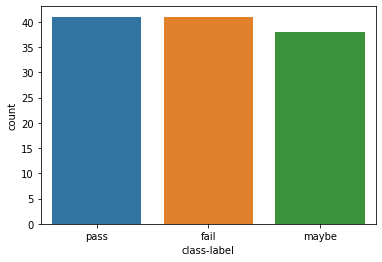

In [33]:
sns.countplot(x='class-label', data=training_labels_df)

### Find Corellation

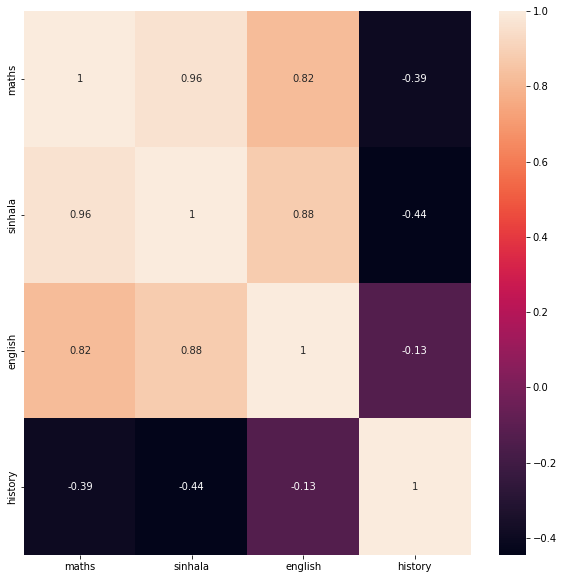

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(training_set_copy.corr(),annot=True)

### Model Development

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

##### 1. Random Forest

In [37]:
train_data_frame = training_set_copy.copy()

In [40]:
labels_train = training_labels_df

In [41]:
X_train, X_test, y_train, y_test = train_test_split(train_data_frame, labels_train, test_size=0.2, random_state=42)

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf_RF=RandomForestClassifier(criterion='entropy', n_estimators = 2000,min_samples_split=8,random_state=42,verbose=5)#RandomForestClassifier(n_estimators=100,max_features='auto',random_state=0, max_depth=12,min_samples_leaf=10)
clf_RF.fit(X_train,y_train)

y_pred_RF=clf_RF.predict(X_test)
y_train_pred_RF = clf_RF.predict(X_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 2000
building tree 2 of 2000
building tree 3 of 2000
building tree 4 of 2000
building tree 5 of 2000
building tree 6 of 2000
building tree 7 of 2000
building tree 8 of 2000
building tree 9 of 2000
building tree 10 of 2000
building tree 11 of 2000
building tree 12 of 2000
building tree 13 of 2000
building tree 14 of 2000
building tree 15 of 2000
building tree 16 of 2000
building tree 17 of 2000
building tree 18 of 2000
building tree 19 of 2000
building tree 20 of 2000
building tree 21 of 2000
building tree 22 of 2000
building tree 23 of 2000
building tree 24 of 2000
building tree 25 of 2000
building tree 26 of 2000
building tree 27 of 2000
building tree 28 of 2000
building tree 29 of 2000
building tree 30 of 2000
building tree 31 of 2000
building tree 32 of 2000
building tree 33 of 2000
building tree 34 of 2000
building tree 35 of 2000
building tree 36 of 2000
building tree 37 of 2000
building tree 38 of 2000
building tree 39 of 2000
building tree 40 of 2000
building 

[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    6.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:

In [43]:
print("train accuracy= ",metrics.accuracy_score(y_train, y_train_pred_RF))
print("test accuracy= ", metrics.accuracy_score(y_test, y_pred_RF))

train accuracy=  0.9791666666666666
test accuracy=  0.9583333333333334


### Submission

In [46]:
test_set.head()

,maths,sinhala,english,history
0,61,73,80,51
1,39,31,66,47
2,56,68,75,44
3,48,47,68,42
4,38,32,66,48


In [47]:
test_set.index

RangeIndex(start=0, stop=30, step=1)

In [44]:
submission_pred = clf_RF.predict(test_set)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.3s finished


In [49]:
submission_pred

array(['fail', 'pass', 'fail', 'maybe', 'pass', 'pass', 'pass', 'maybe',
       'fail', 'fail', 'fail', 'maybe', 'pass', 'maybe', 'fail', 'fail',
       'maybe', 'pass', 'maybe', 'maybe', 'pass', 'maybe', 'fail',
       'maybe', 'maybe', 'fail', 'pass', 'fail', 'maybe', 'pass'],
      dtype=object)

In [52]:
submission_pred
submission_pred_list = []
for i in range(len(submission_pred)):
  submission_pred_list.append(submission_pred[i])

In [54]:
submission_pred_DF = pd.DataFrame(
    {
        "class-label": submission_pred_list
    },
    index = test_set.index
)
print("y_preds.shape:", submission_pred_DF.shape)
submission_pred_DF.head()

y_preds.shape: (30, 1)


,class-label
0,fail
1,pass
2,fail
3,maybe
4,pass


In [55]:
df = submission_pred_DF
df.to_csv('out.csv', index=False)